In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('zomato.csv')
df.insert(0, 'id', range(0, 0 + len(df)))
df.head()

,id,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [26]:
# View the structure of the DataFrame before renaming and selecting columns
print(df.head())

# Rename columns
column_mapping = {
    'Unnamed: 0': 'id',
    'address': 'address',
    'name': 'name',
    'online_order': 'online_order',
    'book_table': 'book_table',
    'rate': 'rating',
    'votes': 'votes',
    'location': 'location',
    'rest_type': 'rest_type',
    'dish_liked': 'dish_liked',
    'cuisines': 'cuisines',
    'approx_cost(for two people)': 'approx_cost',
    'listed_in(type)': 'type'
}
df = df.rename(columns=column_mapping)

# Select only the relevant columns
selected_columns = ['id', 'name', 'online_order', 'book_table', 'rating', 'votes', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost', 'type']
df = df[selected_columns]

df.head()

   id                                            address  \
0   0  942, 21st Main Road, 2nd Stage, Banashankari, ...   
1   1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2   2  1112, Next to KIMS Medical College, 17th Cross...   
3   3  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4   4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   

                    name online_order book_table   rate votes  \
0                  Jalsa          Yes        Yes  4.1/5   775   
1         Spice Elephant          Yes         No  4.1/5   787   
2        San Churro Cafe          Yes         No  3.8/5   918   
3  Addhuri Udupi Bhojana           No         No  3.7/5    88   
4          Grand Village           No         No  3.8/5   166   

                              phone      location            rest_type  \
0    080 42297555\r\n+91 9743772233  Banashankari        Casual Dining   
1                      080 41714161  Banashankari        Casual Dining   
2                    +91 9

,id,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [27]:
# View the number of null values in each column
print(df.isnull().sum())

# Remove rows with null values
df = df.dropna()

# View the number of null values in each column
print(df.isnull().sum())

df.head()

id                  0
name               16
online_order       19
book_table         58
rating           7838
votes              78
location          126
rest_type         338
dish_liked      28225
cuisines          203
approx_cost       521
type             4610
dtype: int64
id              0
name            0
online_order    0
book_table      0
rating          0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
approx_cost     0
type            0
dtype: int64


,id,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [28]:
# View the number of duplicate records
print("Number of duplicate records:", df.duplicated().sum())

# Find duplicate records
duplicate_rows = df[df.duplicated(keep=False)]
print("Duplicate records:")
print(duplicate_rows)

# Remove duplicate records
df = df.drop_duplicates()

Number of duplicate records: 0
Duplicate records:
Empty DataFrame
Columns: [id, name, online_order, book_table, rating, votes, location, rest_type, dish_liked, cuisines, approx_cost, type]
Index: []


In [29]:
# View the updated DataFrame after removing duplicates
df.head()

,id,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [30]:
# Function to perform basic text cleaning
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Clean text in specific columns
columns_to_clean = ['name', 'location', 'rest_type', 'dish_liked', 'cuisines']
for column in columns_to_clean:
    df[column] = df[column].apply(clean_text)

# View the updated DataFrame after text cleaning
df.head()

,id,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,0,jalsa,Yes,Yes,4.1/5,775,banashankari,casual dining,pasta lunch buffet masala papad paneer lajawab...,north indian mughlai chinese,800,Buffet
1,1,spice elephant,Yes,No,4.1/5,787,banashankari,casual dining,momos lunch buffet chocolate nirvana thai gree...,chinese north indian thai,800,Buffet
2,2,san churro cafe,Yes,No,3.8/5,918,banashankari,cafe casual dining,churros cannelloni minestrone soup hot chocola...,cafe mexican italian,800,Buffet
3,3,addhuri udupi bhojana,No,No,3.7/5,88,banashankari,quick bites,masala dosa,south indian north indian,300,Buffet
4,4,grand village,No,No,3.8/5,166,basavanagudi,casual dining,panipuri gol gappe,north indian rajasthani,600,Buffet


In [31]:
# Examine each column and handle irrelevant data
columns_to_examine = ['name', 'online_order', 'book_table', 'rating', 'votes', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost', 'type']

for column in columns_to_examine:
    print("Column:", column)
    
    # View unique values in the column
    unique_values = df[column].unique()
    print("Unique values:")
    print(unique_values)
    
# Verify uniqueness within each column
for column in columns_to_examine:
    # Check if the column has any duplicates
    if df[column].duplicated().any():
        print("Column", column, "contains duplicates.")
        
    else:
        print("Column", column, "has unique values.")

df.head()

Column: name
Unique values:
['jalsa' 'spice elephant' 'san churro cafe' ...
 'ratedn beer good bit beautiful menu finger food makes droolnparticularly good grilled fish roast chicken xmas menu enticing limited'
 'ratedn ambience expect beautiful place like mallnservice top notch table always attended tonfood though always prejudiced towards chinese one better unique chinese tastes time'
 'ratedn ambiance 610nnit needs tidy used tissues scrambled floor']
Column: online_order
Unique values:
['Yes' 'No' " ('Rated 4.0'" ...
 ' ""RATED\\n  Truly what a wonderful place. From the walk through the green route to the actual place'
 ' dirty tables etc... is really a turn off...\\n\\nFood - 7/10\\n\\nVeg Nachos - Lacks the punch... wish the salsa tasted better... nd also wud be grt if u cud introduce an option without gluocumole (not really a fan of it)\\n\\nVeg Sheek Kabab - Tasted Grt'
 " 'RATED\\n  Beer cafe "]
Column: book_table
Unique values:
['Yes' 'No' " 'RATED\\n  Amazing cafe" ...
 ' ""R

,id,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,0,jalsa,Yes,Yes,4.1/5,775,banashankari,casual dining,pasta lunch buffet masala papad paneer lajawab...,north indian mughlai chinese,800,Buffet
1,1,spice elephant,Yes,No,4.1/5,787,banashankari,casual dining,momos lunch buffet chocolate nirvana thai gree...,chinese north indian thai,800,Buffet
2,2,san churro cafe,Yes,No,3.8/5,918,banashankari,cafe casual dining,churros cannelloni minestrone soup hot chocola...,cafe mexican italian,800,Buffet
3,3,addhuri udupi bhojana,No,No,3.7/5,88,banashankari,quick bites,masala dosa,south indian north indian,300,Buffet
4,4,grand village,No,No,3.8/5,166,basavanagudi,casual dining,panipuri gol gappe,north indian rajasthani,600,Buffet


In [32]:
# Clean the dataset
df_cleaned = df.applymap(lambda x: x.encode('ascii', 'ignore').decode('ascii') if isinstance(x, str) else x)

# Export the cleaned dataset to a new file
df_cleaned.to_csv('zomatocleaned.csv', index=False)

print("Cleaned dataset exported to 'zomatocleaned.csv'.")

Cleaned dataset exported to 'zomatocleaned.csv'.


In [33]:
df = pd.read_csv('zomatocleaned.csv')
df.head()

,id,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,0,jalsa,Yes,Yes,4.1/5,775,banashankari,casual dining,pasta lunch buffet masala papad paneer lajawab...,north indian mughlai chinese,800,Buffet
1,1,spice elephant,Yes,No,4.1/5,787,banashankari,casual dining,momos lunch buffet chocolate nirvana thai gree...,chinese north indian thai,800,Buffet
2,2,san churro cafe,Yes,No,3.8/5,918,banashankari,cafe casual dining,churros cannelloni minestrone soup hot chocola...,cafe mexican italian,800,Buffet
3,3,addhuri udupi bhojana,No,No,3.7/5,88,banashankari,quick bites,masala dosa,south indian north indian,300,Buffet
4,4,grand village,No,No,3.8/5,166,basavanagudi,casual dining,panipuri gol gappe,north indian rajasthani,600,Buffet


In [34]:
# For a high-level overview of the hotels, provide us the top 5 most voted hotels in the delivery category.
# Filter the dataset for delivery category
delivery_df = df[df['type'] == 'Delivery']

# Sort the hotels based on votes in descending order
sorted_df = delivery_df.sort_values(by='votes', ascending=False)

# Select the top 5 hotels with the most votes
top_5_hotels = sorted_df.head(5)

# Display the top 5 hotels
print(top_5_hotels[['name', 'votes']])

              name votes
16285  khawa karpo   996
14968  khawa karpo   995
13381  khawa karpo   995
12330  khawa karpo   995
13548     kargeens   992


In [35]:
# The rating of a hotel is a key identifier in determining a restaurant’s performance. 
# Hence for a particular location called Banashankari find out the top 5 highly rated hotels in the delivery category.
# Filter the dataset for hotels in Banashankari and with online ordering
banashankari_delivery_df = df[(df['location'] == 'banashankari') & (df['online_order'] == 'Yes')]

# Sort the hotels based on the 'rating' column in descending order
sorted_df = banashankari_delivery_df.sort_values(by='rating', ascending=False)

# Select the top 5 highly rated hotels
top_5_hotels = sorted_df.head(5)

# Display the top 5 highly rated hotels
print(top_5_hotels[['name', 'rating']])

                 name rating
1000           onesta  4.6/5
8791           onesta  4.6/5
6              onesta  4.6/5
251            onesta  4.6/5
293   ayodhya upachar  4.3/5


In [36]:
# Compare the ratings of the cheapest and most expensive hotels in Indiranagar.
# Filter the dataset for hotels in Indiranagar
indiranagar_df = df[df['location'] == 'indiranagar']

# Check if there are any hotels in Indiranagar
if indiranagar_df.empty:
    print("No hotels found in Indiranagar.")
else:
    # Sort the hotels based on the 'approx_cost' column in ascending order
    sorted_df = indiranagar_df.sort_values(by='approx_cost')

    # Check if there are any rows in the sorted DataFrame
    if sorted_df.empty:
        print("No hotels found in Indiranagar.")
    else:
        # Get the rating of the cheapest hotel
        cheapest_hotel_rating = sorted_df.iloc[0]['rating']

        # Get the rating of the most expensive hotel
        most_expensive_hotel_rating = sorted_df.iloc[-1]['rating']

        # Display the ratings of the cheapest and most expensive hotels
        print("Cheapest Hotel Rating:", cheapest_hotel_rating)
        print("Most Expensive Hotel Rating:", most_expensive_hotel_rating)

Cheapest Hotel Rating: 3.8 /5
Most Expensive Hotel Rating: 4.1/5


In [37]:
df.head()

,id,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost,type
0,0,jalsa,Yes,Yes,4.1/5,775,banashankari,casual dining,pasta lunch buffet masala papad paneer lajawab...,north indian mughlai chinese,800,Buffet
1,1,spice elephant,Yes,No,4.1/5,787,banashankari,casual dining,momos lunch buffet chocolate nirvana thai gree...,chinese north indian thai,800,Buffet
2,2,san churro cafe,Yes,No,3.8/5,918,banashankari,cafe casual dining,churros cannelloni minestrone soup hot chocola...,cafe mexican italian,800,Buffet
3,3,addhuri udupi bhojana,No,No,3.7/5,88,banashankari,quick bites,masala dosa,south indian north indian,300,Buffet
4,4,grand village,No,No,3.8/5,166,basavanagudi,casual dining,panipuri gol gappe,north indian rajasthani,600,Buffet


In [38]:
# Check for missing values in the 'votes' column
missing_votes = df['votes'].isnull().sum()
if missing_votes > 0:
    # Handle missing values by filling them with 0 or any other appropriate strategy
    df['votes'].fillna(0, inplace=True)

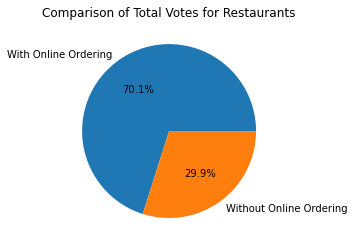

In [39]:
# Online ordering of food has exponentially increased over time. 
# Compare the total votes of restaurants that provide online ordering services and 
# those that don’t provide online ordering services.

# Convert the 'votes' column to numeric values
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Filter the dataset to include only valid votes and remove null values
valid_votes_df = df[df['votes'].notnull()]

# Group the dataset based on the online_order column and calculate the total votes for each group
grouped_votes = valid_votes_df.groupby('online_order')['votes'].sum()

# Extract the total votes for restaurants with online ordering
votes_with_online_order = grouped_votes.get('Yes', 0)

# Extract the total votes for restaurants without online ordering
votes_without_online_order = grouped_votes.get('No', 0)

# Create a pie chart to compare the total votes
labels = ['With Online Ordering', 'Without Online Ordering']
sizes = [votes_with_online_order, votes_without_online_order]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Comparison of Total Votes for Restaurants')
plt.show()

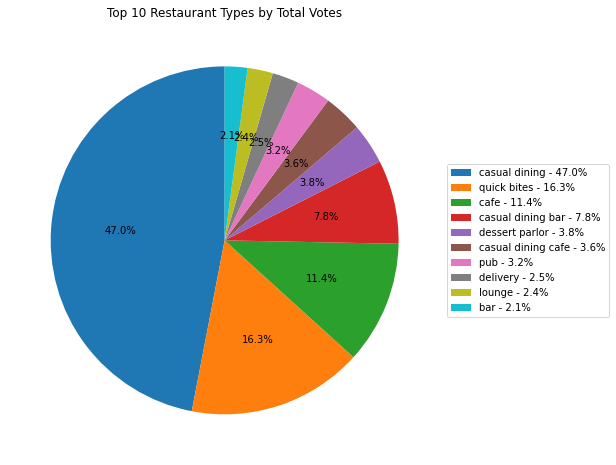

In [40]:
# Number of votes defines how much the customers are involved with the service provided by the restaurants.
# For each Restaurant type, find out the number of restaurants, total votes, and average rating.
# Display the data with the highest votes on the top.

# Convert the 'votes' column to numeric values, replacing non-numeric values with NaN
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Filter out rows with non-numeric votes
valid_votes_df = df[df['votes'].notnull()]

# Group the dataset by restaurant type and calculate the total votes
restaurant_type_votes = valid_votes_df.groupby('rest_type')['votes'].sum()

# Sort the data by total votes in descending order and select the top 10
top_10_restaurant_types = restaurant_type_votes.nlargest(10)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _, autopcts = ax.pie(top_10_restaurant_types, labels=None, autopct='%1.1f%%', startangle=90)

# Extract the percentages from the autopct objects
percentages = [float(p.get_text().strip('%')) for p in autopcts]

# Create a legend with percentages
legend_labels = [f'{t} - {p:.1f}%' for t, p in zip(top_10_restaurant_types.index, percentages)]
ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True)

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.set_aspect('equal')

# Remove labels from the pie chart
ax.set_ylabel('')

# Set a title for the pie chart
ax.set_title('Top 10 Restaurant Types by Total Votes')

plt.show()

In [41]:
# What is the most liked dish of the most-voted restaurant on Zomato(as the restaurant has a tie-up with Zomato, 
# the restaurant compulsorily provides online ordering and delivery facilities.

# Sort the DataFrame by votes in descending order
sorted_df = df.sort_values(by='votes', ascending=False)

# Get the most-voted restaurant
most_voted_restaurant = sorted_df.iloc[0]

# Get the name of the most-voted restaurant
most_voted_restaurant_name = most_voted_restaurant['name']

# Get the dishes of the most-voted restaurant
most_voted_restaurant_dishes = most_voted_restaurant['dish_liked']

# Split the dish_liked string into a list of dishes
most_voted_restaurant_dishes_list = most_voted_restaurant_dishes.split(',')

# Remove leading/trailing spaces from each dish
most_voted_restaurant_dishes_list = [dish.strip() for dish in most_voted_restaurant_dishes_list]

# Print the most-voted restaurant and its dishes
print("Most-Voted Restaurant:", most_voted_restaurant_name)
print("Most-Liked Dishes:")
for dish in most_voted_restaurant_dishes_list:
    print(dish)

Most-Voted Restaurant: byg brewski brewing company
Most-Liked Dishes:
cocktails dahi kebab rajma chawal butter chicken craft beer chicken dumplings teriyaki fish


In [42]:
# To increase the maximum profit, Zomato is in need to expand its business. 
# For doing so Zomato wants the list of the top 15 restaurants which have min 150 votes, have a rating greater than 3, 
# and is currently not providing online ordering. Display the restaurants with the highest votes on the top.

# Convert the 'votes' column to numeric values
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Filter the restaurants based on the given criteria
filtered_df = df[(df['votes'] >= 150) & (df['rating'] > 3) & (df['online_order'] == 'No')]

# Sort the filtered DataFrame by votes in descending order
sorted_df = filtered_df.sort_values(by='votes', ascending=False)

# Select the top 15 restaurants
top_restaurants = sorted_df.head(15)

# Display the top restaurants with the highest votes
if len(top_restaurants) > 0:
    print("Top 15 Restaurants with Min 150 Votes and No Online Ordering:")
    for index, row in top_restaurants.iterrows():
        print("Restaurant Name:", row['name'])
        print("Votes:", row['votes'])
        print("Online Order Available:", row['online_order'])
        print("-----------------------------")
else:
    print("No restaurants found that meet the specified criteria.")


No restaurants found that meet the specified criteria.


In [43]:
# To increase the maximum profit, Zomato is in need to expand its business. 
# For doing so Zomato wants the list of the top 15 restaurants which have min 150 votes, 
# and is currently not providing online ordering. Display the restaurants with the highest votes on the top.
# As the previous segment shows that there are no resturants with ratings greater than 3, I removed that criteria.

# Convert the 'votes' column to numeric values
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Filter the restaurants based on the given criteria
filtered_df = df[(df['votes'] >= 150) & (df['online_order'] == 'No')]

# Sort the filtered DataFrame by votes in descending order
sorted_df = filtered_df.sort_values(by='votes', ascending=False)

# Select the top 15 restaurants
top_restaurants = sorted_df.head(15)

# Display the top restaurants with the highest votes
if len(top_restaurants) > 0:
    print("Top 15 Restaurants with Min 150 Votes and No Online Ordering:")
    for index, row in top_restaurants.iterrows():
        print("Restaurant Name:", row['name'])
        print("Votes:", row['votes'])
        print("Online Order Available:", row['online_order'])
        print("-----------------------------")
else:
    print("No restaurants found that meet the specified criteria.")

Top 15 Restaurants with Min 150 Votes and No Online Ordering:
Restaurant Name: toit
Votes: 14956.0
Online Order Available: No
-----------------------------
Restaurant Name: truffles
Votes: 14704.0
Online Order Available: No
-----------------------------
Restaurant Name: truffles
Votes: 14654.0
Online Order Available: No
-----------------------------
Restaurant Name: truffles
Votes: 14654.0
Online Order Available: No
-----------------------------
Restaurant Name: black pearl
Votes: 10471.0
Online Order Available: No
-----------------------------
Restaurant Name: black pearl
Votes: 10413.0
Online Order Available: No
-----------------------------
Restaurant Name: big pitcher
Votes: 9041.0
Online Order Available: No
-----------------------------
Restaurant Name: big pitcher
Votes: 9041.0
Online Order Available: No
-----------------------------
Restaurant Name: arbor brewing company
Votes: 8414.0
Online Order Available: No
-----------------------------
Restaurant Name: prost brew pub
Votes: